<a href="https://colab.research.google.com/github/kartikvirendrar/Cristl/blob/main/project2_HAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.6.0


In [2]:
from google.colab import drive
import pandas as pd
file_location = '/content/drive/MyDrive/accelerometer.csv'
accelerometer =pd.read_csv(file_location)
accelerometer.drop(columns=['time','repetition','uuid'], inplace=True)
accsitting= accelerometer[accelerometer['activity'] == 'CHAIR'].head(31668)
accstanding= accelerometer[accelerometer['activity'] == 'STANDING']
acclying= accelerometer[accelerometer['activity'] == 'LYING_UP']
acclying= acclying.append(accelerometer[accelerometer['activity'] == 'LYING_SIDE'].head(520))
acclying.drop(columns=['activity'], inplace=True)
acclying['activity']='LYING_UP'
accdataset = pd.DataFrame()
accdataset = accdataset.append([accsitting, accstanding, acclying])

file_location1 = '/content/drive/MyDrive/gyroscope.csv'
gyroscope =pd.read_csv(file_location1)
gyroscope.drop(columns=['time','repetition','uuid'], inplace=True)
gyrsitting= gyroscope[gyroscope['activity'] == 'CHAIR'].head(9875)
gyrstanding= gyroscope[gyroscope['activity'] == 'STANDING'].head(9875)
gyrlying= gyroscope[gyroscope['activity'] == 'LYING_UP'].head(9875)
gyrdataset = pd.DataFrame()
gyrdataset = gyrdataset.append([gyrsitting, gyrstanding, gyrlying])

In [3]:
accdataset.info()
gyrdataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95004 entries, 0 to 5319
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      95004 non-null  object 
 1   acc_x     95004 non-null  float64
 2   acc_y     95004 non-null  float64
 3   acc_z     95004 non-null  float64
 4   activity  95004 non-null  object 
dtypes: float64(3), object(2)
memory usage: 4.3+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 29625 entries, 0 to 89378
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      29625 non-null  object 
 1   gyr_x     29625 non-null  float64
 2   gyr_y     29625 non-null  float64
 3   gyr_z     29625 non-null  float64
 4   activity  29625 non-null  object 
dtypes: float64(3), object(2)
memory usage: 1.4+ MB


In [4]:
accdataset['activity'].value_counts()

STANDING    31668
LYING_UP    31668
CHAIR       31668
Name: activity, dtype: int64

In [5]:
gyrdataset['activity'].value_counts()

STANDING    9875
CHAIR       9875
LYING_UP    9875
Name: activity, dtype: int64

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
alabel=LabelEncoder()
accdataset['label']=alabel.fit_transform(accdataset['activity'])
print(accdataset.head())
print(alabel.classes_)

            name     acc_x     acc_y     acc_z activity  label
0  accelerometer -0.414825  7.590469  6.235336    CHAIR      0
1  accelerometer -0.337662  7.645508  6.125275    CHAIR      0
2  accelerometer -0.393295  7.605423  6.231155    CHAIR      0
3  accelerometer -0.469269  7.592865  6.281403    CHAIR      0
4  accelerometer -0.418411  7.633530  6.317307    CHAIR      0
['CHAIR' 'LYING_UP' 'STANDING']


In [7]:
glabel=LabelEncoder()
gyrdataset['label']=glabel.fit_transform(gyrdataset['activity'])
print(gyrdataset.head())
print(glabel.classes_)

        name     gyr_x     gyr_y     gyr_z activity  label
0  gyroscope -0.309540  7.679596  6.142029    CHAIR      0
1  gyroscope -0.530884  7.897354  5.765747    CHAIR      0
2  gyroscope -0.608643  8.231140  5.266846    CHAIR      0
3  gyroscope -0.570953  8.260452  5.229172    CHAIR      0
4  gyroscope -0.816223  8.244308  5.284195    CHAIR      0
['CHAIR' 'LYING_UP' 'STANDING']


In [8]:
AX = accdataset[['acc_x','acc_y','acc_z']]
AY = accdataset['label']
scaler = StandardScaler()
AX = scaler.fit_transform(AX)
Ascaled_X = pd.DataFrame(data=AX, columns=['acc_x','acc_y','acc_z'])
Ascaled_X['label'] = AY.values
Ascaled_X

,acc_x,acc_y,acc_z,label
0,-0.407332,0.535859,0.414297,0
1,-0.342817,0.557656,0.395899,0
2,-0.389331,0.541781,0.413598,0
3,-0.452851,0.536808,0.421998,0
4,-0.410330,0.552913,0.427999,0
...,...,...,...,...
94999,-0.532368,1.405810,-0.635258,1
95000,-0.584891,1.400359,-0.640058,1
95001,-0.561876,1.406281,-0.642660,1
95002,-0.572389,1.409841,-0.661458,1


In [9]:
GX = gyrdataset[['gyr_x','gyr_y','gyr_z']]
GY = gyrdataset['label']
scaler = StandardScaler()
GX = scaler.fit_transform(GX)
Gscaled_X = pd.DataFrame(data=GX, columns=['gyr_x','gyr_y','gyr_z'])
Gscaled_X['label'] = GY.values
Gscaled_X

,gyr_x,gyr_y,gyr_z,label
0,-0.511514,0.743974,0.380241,0
1,-0.751855,0.819761,0.323345,0
2,-0.836288,0.935931,0.247909,0
3,-0.795364,0.946133,0.242213,0
4,-1.061684,0.940514,0.250533,0
...,...,...,...,...
29620,0.393923,1.434373,-0.432256,1
29621,0.417320,1.446039,-0.434066,1
29622,0.326331,1.445205,-0.435876,1
29623,0.383524,1.451038,-0.441668,1


In [10]:
import scipy.stats as stats
Fs = 20
frame_s = Fs*2
hop_s = Fs

In [11]:
def aget_frames(df, frame_s, hop_s):
  N = 3
  frames=[]
  labels=[]
  for i in range(0, len(df) - frame_s, hop_s):
    x = df['acc_x'].values[i: i+frame_s]
    y = df['acc_y'].values[i: i+frame_s]
    z = df['acc_z'].values[i: i+frame_s]

    label = stats.mode(df['label'][i:i+frame_s])[0][0]
    frames.append([x,y,z])
    labels.append(label)
  
  frames = np.asarray(frames).reshape(-1, frame_s, N)
  labels = np.asarray(labels)
  
  return frames, labels

In [12]:
def gget_frames(df, frame_s, hop_s):
  N = 3
  frames=[]
  labels=[]
  for i in range(0, len(df) - frame_s, hop_s):
    x = df['gyr_x'].values[i: i+frame_s]
    y = df['gyr_y'].values[i: i+frame_s]
    z = df['gyr_z'].values[i: i+frame_s]

    label = stats.mode(df['label'][i:i+frame_s])[0][0]
    frames.append([x,y,z])
    labels.append(label)
  
  frames = np.asarray(frames).reshape(-1, frame_s, N)
  labels = np.asarray(labels)
  
  return frames, labels

In [13]:
AX, AY = aget_frames(Ascaled_X, frame_s, hop_s)
GX, GY = gget_frames(Gscaled_X, frame_s, hop_s)

In [14]:
AX.shape, AY.shape

((4749, 40, 3), (4749,))

In [15]:
GX.shape, GY.shape

((1480, 40, 3), (1480,))

In [16]:
AX_train, AX_test, AY_train, AY_test = train_test_split(AX, AY, test_size=0.2, stratify=AY)
GX_train, GX_test, GY_train, GY_test = train_test_split(GX, GY, test_size=0.2, stratify=GY)

In [17]:
AX_train.shape, AX_test.shape

((3799, 40, 3), (950, 40, 3))

In [18]:
GX_train.shape, GX_test.shape

((1184, 40, 3), (296, 40, 3))

In [19]:
AX_train = AX_train.reshape(len(AX_train), 40, 3, 1)
AX_test = AX_test.reshape(len(AX_test), 40, 3, 1)
GX_train = GX_train.reshape(len(GX_train), 40, 3, 1)
GX_test = GX_test.reshape(len(GX_test), 40, 3, 1)

In [20]:
amodel = Sequential()
amodel.add(Conv2D(16, (2,2), activation='relu', input_shape = AX_train[0].shape))
amodel.add(Dropout(0.1))

amodel.add(Conv2D(32, (2,2), activation='relu'))
amodel.add(Dropout(0.2))

amodel.add(Flatten())

amodel.add(Dense(64, activation='relu'))
amodel.add(Dropout(0.5))
amodel.add(Dense(6, activation='softmax'))

In [21]:
amodel.compile(optimizer=Adam(learning_rate = 0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [22]:
ahistory = amodel.fit(AX_train, AY_train, epochs=20, validation_data=(AX_test, AY_test), verbose=1)

Epoch 1/20
119/119 [==============================] - 2s 9ms/step - loss: 0.7306 - accuracy: 0.6352 - val_loss: 0.5342 - val_accuracy: 0.6495
Epoch 2/20
119/119 [==============================] - 1s 8ms/step - loss: 0.5712 - accuracy: 0.6957 - val_loss: 0.5062 - val_accuracy: 0.7305
Epoch 3/20
119/119 [==============================] - 1s 8ms/step - loss: 0.5403 - accuracy: 0.7089 - val_loss: 0.4901 - val_accuracy: 0.7537
Epoch 4/20
119/119 [==============================] - 1s 7ms/step - loss: 0.5169 - accuracy: 0.7215 - val_loss: 0.4739 - val_accuracy: 0.7547
Epoch 5/20
119/119 [==============================] - 1s 8ms/step - loss: 0.5017 - accuracy: 0.7394 - val_loss: 0.4720 - val_accuracy: 0.7705
Epoch 6/20
119/119 [==============================] - 1s 8ms/step - loss: 0.5010 - accuracy: 0.7299 - val_loss: 0.4585 - val_accuracy: 0.7768
Epoch 7/20
119/119 [==============================] - 1s 7ms/step - loss: 0.4839 - accuracy: 0.7439 - val_loss: 0.4525 - val_accuracy: 0.7832
Epoch 

In [23]:
gmodel = Sequential()
gmodel.add(Conv2D(16, (2,2), activation='relu', input_shape = GX_train[0].shape))
gmodel.add(Dropout(0.1))

gmodel.add(Conv2D(32, (2,2), activation='relu'))
gmodel.add(Dropout(0.2))

gmodel.add(Flatten())

gmodel.add(Dense(64, activation='relu'))
gmodel.add(Dropout(0.5))
gmodel.add(Dense(6, activation='softmax'))

In [24]:
gmodel.compile(optimizer=Adam(learning_rate = 0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [25]:
ghistory = gmodel.fit(GX_train, GY_train, epochs=20, validation_data=(GX_test, GY_test), verbose=1)

Epoch 1/20
37/37 [==============================] - 1s 16ms/step - loss: 0.9979 - accuracy: 0.5777 - val_loss: 0.6525 - val_accuracy: 0.7027
Epoch 2/20
37/37 [==============================] - 0s 8ms/step - loss: 0.7023 - accuracy: 0.6512 - val_loss: 0.5661 - val_accuracy: 0.6723
Epoch 3/20
37/37 [==============================] - 0s 8ms/step - loss: 0.6369 - accuracy: 0.6647 - val_loss: 0.5465 - val_accuracy: 0.6993
Epoch 4/20
37/37 [==============================] - 0s 6ms/step - loss: 0.5988 - accuracy: 0.6951 - val_loss: 0.5119 - val_accuracy: 0.7500
Epoch 5/20
37/37 [==============================] - 0s 7ms/step - loss: 0.5445 - accuracy: 0.7221 - val_loss: 0.5193 - val_accuracy: 0.7534
Epoch 6/20
37/37 [==============================] - 0s 6ms/step - loss: 0.5289 - accuracy: 0.7348 - val_loss: 0.5107 - val_accuracy: 0.7264
Epoch 7/20
37/37 [==============================] - 0s 7ms/step - loss: 0.5015 - accuracy: 0.7542 - val_loss: 0.5107 - val_accuracy: 0.7196
Epoch 8/20
37/37 [=

In [26]:
def plot_accuracycurve(a, history, epochs):
  ep = range(1, epochs+1)
  plt.title(a+' Model Accuracy')
  plt.plot(ep, history.history['accuracy'])
  plt.plot(ep, history.history['val_accuracy'])
  plt.ylabel('Accuracy')
  plt.ylabel('Epochs')
  plt.legend(['Train','Val'])
  plt.show()

def plot_losscurve(a, history, epochs):
  ep = range(1, epochs+1)
  plt.title(a+' Model Loss')
  plt.plot(ep, history.history['loss'])
  plt.plot(ep, history.history['val_loss'])
  plt.ylabel('Loss')
  plt.ylabel('Epochs')
  plt.legend(['Train','Val'])
  plt.show()

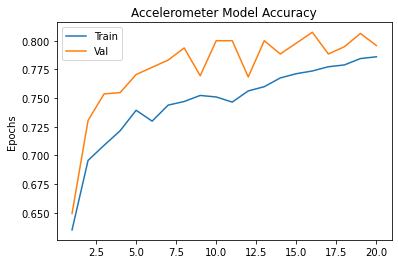

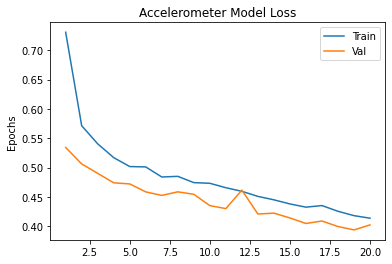

In [27]:
plot_accuracycurve('Accelerometer',ahistory, 20)
plot_losscurve('Accelerometer', ahistory, 20)

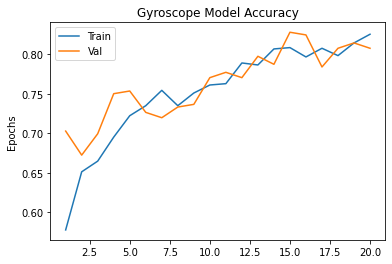

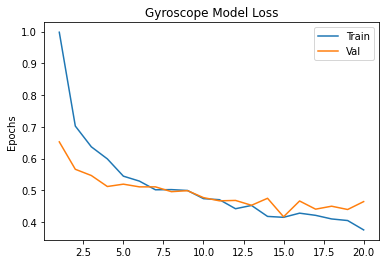

In [28]:
plot_accuracycurve('Gyroscope',ghistory, 20)
plot_losscurve('Gyroscope', ghistory, 20)

In [29]:
pip install mlxtend

In [30]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [31]:
AY_P = amodel.predict(AX_test)
AY_predict=np.argmax(AY_P,axis=1)
GY_P = gmodel.predict(GX_test)
GY_predict=np.argmax(GY_P,axis=1)

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9562015590>)

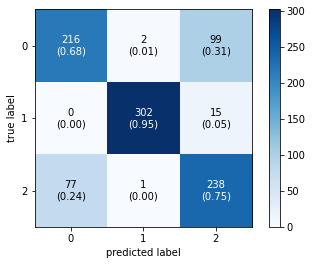

In [32]:
amat = confusion_matrix(AY_test, AY_predict)
plot_confusion_matrix(conf_mat=amat, show_normed=True, colorbar=True)

In [33]:
print(alabel.classes_)

['CHAIR' 'LYING_UP' 'STANDING']


(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f95618bdad0>)

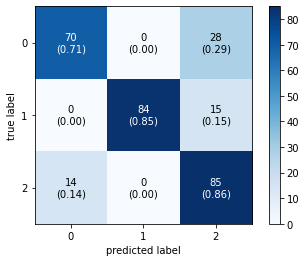

In [34]:
gmat = confusion_matrix(GY_test, GY_predict)
plot_confusion_matrix(conf_mat=gmat, show_normed=True, colorbar=True)

In [35]:
print(glabel.classes_)

['CHAIR' 'LYING_UP' 'STANDING']
